# Calculando el tamaño ideal de las particiones

En este notebook se va a analizar el rendimiento del algoritmo dependiendo del tamaño de la partición.

Para ello se va a crear un conjunto de datos y se va a comprimir y descompirmir usando diferentes tamaños de particiones.

Finalmente, se va a hacer una gráfica con los tiempos de decompresión en cada partición.

## Paquetes necesarios

In [1]:
import transformData as td
import matplotlib.pyplot as plt
import numpy as np
import time as t
from math import ceil

## Definición del conjunto de datos

### Datos sin transformación

El conjunto de datos que se va a usar será de 4 dimensiones de 128 elementos cada dimensión. Por tanto habrá $128^4 = 268.435.456$ elementos.

In [2]:
SHAPE = [64, 64, 64, 64]

SIZE = np.prod(SHAPE)

src = np.arange(SIZE, dtype=np.int32).reshape(SHAPE)

ITEMSIZE = src.itemsize

DTYPE = src.dtype

### Calculando los tiempos de decompresión

El tamaño de las particiones tiene que ser más pequeño que el del conjunto de datos. En este caso, las particiones son de 16 elementos por cada dimensión lo que resulta que cada partición tendrá $16^4=65.536$ elementos.

In [3]:
y = []
labels = []

ant_part = -1

div = 0

while True:
    
    PART_SHAPE = [ceil(min(SHAPE)/1.3**div)] * len(SHAPE)
    
    if PART_SHAPE[0] != ant_part:
        src_part = td.tData(src, PART_SHAPE, inverse=False)

        TSHAPE = src_part.shape

        # Compresión

        start = t.perf_counter()
        dest_trans = td.compress(src_part, PART_SHAPE)
        end = t.perf_counter()

        ct_t = end - start

        # Decompresión

        t_total = []
        
        for _ in range(5):
            start = t.perf_counter()
            res_trans = td.decompress_trans(dest_trans, SHAPE, TSHAPE, PART_SHAPE, a=36, c=55)
            end = t.perf_counter()

            dt_t = end - start
            
            t_total.append(dt_t)
        
        y.append(min(t_total))
        labels.append(ceil(min(SHAPE)/1.3**div))

        ant_aprt = PART_SHAPE[0]
        
        if y[-1] > y[0] and div > 5:
            break
    
    div += 1
    

## Resultados y conclusiones

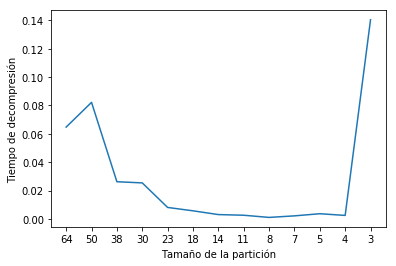

In [5]:
plt.plot(np.arange(len(y)), y)
plt.xticks(np.arange(len(y)), labels)
plt.ylabel('Tiempo de decompresión')
plt.xlabel('Tamaño de la partición')
plt.show()